In [40]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import math
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.wrappers.scikit_learn import KerasRegressor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, MeanAbsolutePercentageError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from matplotlib.pyplot import figure
from numpy import asarray

/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_9640/4074705024.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df=pd.read_csv("Data/FoodBalanceSheets_E_All_Data/FoodBalanceSheets_E_All_Data_NOFLAG.csv", encoding="latin-1")

In [3]:
df.drop(["Area Code","Item Code","Element Code"],axis=1,inplace=True)
df

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,Population,Total Population - Both sexes,1000 persons,29186.00,30117.00,31161.00,32270.00,33371.00,34414.00,35383.00,36296.00,37172.00,38042.00
1,Afghanistan,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/capita/day,2170.00,2152.00,2159.00,2196.00,2265.00,2250.00,2228.00,2303.00,2270.00,2273.00
3,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/capita/day,59.23,58.00,57.82,57.71,60.17,58.45,58.46,59.50,57.62,57.31
4,Afghanistan,Grand Total,Fat supply quantity (g/capita/day),g/capita/day,36.69,34.81,36.53,37.10,41.48,38.28,40.70,40.03,41.46,39.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319738,Net Food Importing Developing Countries,Miscellaneous,Food,1000 tonnes,787.00,839.00,921.00,935.00,958.00,992.00,1032.00,1066.00,1140.00,1199.00
319739,Net Food Importing Developing Countries,Miscellaneous,Food supply quantity (kg/capita/yr),kg,0.62,0.65,0.68,0.67,0.67,0.68,0.69,0.70,0.73,0.75
319740,Net Food Importing Developing Countries,Miscellaneous,Food supply (kcal/capita/day),kcal/capita/day,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
319741,Net Food Importing Developing Countries,Miscellaneous,Protein supply quantity (g/capita/day),g/capita/day,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [4]:
df.dropna(axis=0, inplace=True)

In [5]:
df=df.loc[~(df.iloc[:,4:]==0).all(axis=1)]

In [6]:
# df.Area.value_counts()[40:80]

In [7]:
# df.Item.value_counts()[:30]

In [8]:
df=df[df.Element=="Losses"]

In [86]:
df

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
18,Afghanistan,Cereals - Excluding Beer,Losses,1000 tonnes,837.0,647.0,911.0,936.0,963.0,837.0,800.0,706.0,595.0,809.0
35,Afghanistan,Wheat and products,Losses,1000 tonnes,678.0,508.0,758.0,775.0,803.0,701.0,684.0,642.0,542.0,734.0
50,Afghanistan,Rice and products,Losses,1000 tonnes,47.0,47.0,35.0,36.0,36.0,29.0,25.0,24.0,25.0,27.0
65,Afghanistan,Barley and products,Losses,1000 tonnes,65.0,46.0,70.0,77.0,77.0,60.0,44.0,14.0,9.0,17.0
80,Afghanistan,Maize and products,Losses,1000 tonnes,45.0,45.0,47.0,47.0,47.0,47.0,47.0,26.0,19.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319466,Net Food Importing Developing Countries,"Fats, Animals, Raw",Losses,1000 tonnes,35.0,36.0,40.0,41.0,41.0,42.0,42.0,46.0,50.0,52.0
319507,Net Food Importing Developing Countries,Eggs,Losses,1000 tonnes,340.0,359.0,364.0,379.0,407.0,417.0,415.0,443.0,455.0,480.0
319524,Net Food Importing Developing Countries,Eggs,Losses,1000 tonnes,340.0,359.0,364.0,379.0,407.0,417.0,415.0,443.0,455.0,480.0
319540,Net Food Importing Developing Countries,Milk - Excluding Butter,Losses,1000 tonnes,8759.0,8995.0,9678.0,12807.0,12835.0,13291.0,11108.0,11330.0,11543.0,11989.0


In [9]:
def select(area,item ):
    data=df[df.Area==area]
    data=data[data['Item'].str.contains(item)]
    if len(data)>25:
        data=data[data.Item==item]
    return data

Plot graphs for each country

In [10]:
# countries=[x for x in df.Area.unique()]
# commodities=[x for x in df.Item.unique()]
# # countries=["Malawi"]
# for i in countries:
#     for j in commodities:
#         try:
#             data=select(i,j)
#             losses=pd.DataFrame(data.iloc[0,4:])
#             losses.columns=["Actual"]
#             plt.plot(losses.index,losses["Actual"])
#             plt.title(i+"-"+j)
#             plt.show()
#         except:
#             pass

In [11]:
data=select("Benin","Rice")
data

,Area,Item,Element,Unit,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
23133,Benin,Rice and products,Losses,1000 tonnes,31.0,55.0,54.0,92.0,59.0,53.0,76.0,70.0,115.0,102.0


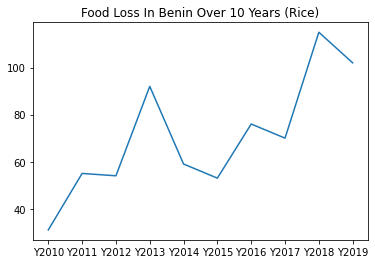

In [13]:
losses=pd.DataFrame(data.iloc[0,4:])
losses.columns=["Actual"]
plt.plot(losses.index,losses["Actual"])
plt.title("Food Loss In Benin Over 10 Years (Rice)")
plt.show()

# MEAN-BASED PREDICTION

Calculate the loss value of an upcoming year based on the average of previous losses

In [14]:
# def mean_based(year):
#     try:
#         mean_pred=[]
#         losses=data[data.Element=="Losses"].iloc[0,4:]
#         count=0
#         sum=0
#         for i in losses.index:
#             if i=="Y"+str(year):
#                 break
#             sum=losses[i]+sum
#             count+=1
#         mean_pred=sum/count
#         return mean_pred
#     except:
#         return losses["Y"+str(year)]

def mean_based(year):
    try:
        mean_pred=[]
        losses=data[data.Element=="Losses"].iloc[0,4:]
        count=0
        sum=0
        for i in range(0,2):
            sum+=losses["Y"+str(year-i-1)]
            count+=1
        mean_pred=sum/count
        return mean_pred
    except:
        if year==2010:
            return losses["Y"+str(year)]
        if year==2011:
            return (losses["Y"+str(year-1)])
        if year==2012:
            return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)]))/2
        # if year==2013:
        #     return (losses["Y"+str(year-1)]+(losses["Y"+str(year-2)])+(losses["Y"+str(year-3)]))/3

In [15]:
def by_average(data):
    mean_based_pred=[]
    losses=pd.DataFrame(data[data.Element=="Losses"].iloc[0,4:])
    losses.columns=["Actual"]
    losses["MeanBasedPred"]=np.zeros([len(losses)])
    for i in losses.index:
        losses["MeanBasedPred"][i]=mean_based(int(i[1:]))
    losses.reset_index()
    MSE = np.square(np.subtract(losses["Actual"].values,losses["MeanBasedPred"].values)).mean() 
    RMSE = math.sqrt(MSE)
    MAPE= np.mean(np.abs((losses["MeanBasedPred"].values - losses["Actual"].values) /losses["Actual"].values))*100
    print("RMSE =",RMSE)
    print("MAPE =",np.mean(np.abs((losses["Actual"].values - losses["MeanBasedPred"].values)/losses["Actual"].values))*100)
    return losses, MSE, RMSE, MAPE

In [16]:
losses,mse_mean,rmse_mean,mape_mean=by_average(data)
mse_mean,rmse_mean,mape_mean

RMSE = 22.561028345356956
MAPE = 25.095764427141066


/var/folders/t6/nkv95bj97gv9j73w9bfk2p0r0000gn/T/ipykernel_9640/3085655691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  losses["MeanBasedPred"][i]=mean_based(int(i[1:]))


(509.0, 22.561028345356956, 25.095764427141066)

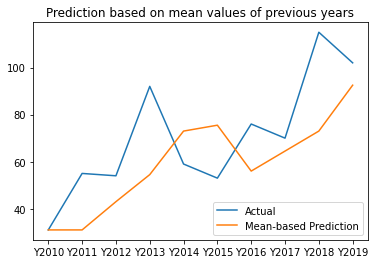

In [17]:
plt.plot(losses.index,losses["Actual"])
plt.plot(losses.index,losses.MeanBasedPred)
plt.title("Prediction based on mean values of previous years")
plt.legend(['Actual', 'Mean-based Prediction'], loc='lower right')

In [21]:
# # population=df[df["Element"]=="Total Population - Both sexes"]
# # population=population[population.Area=="China"].iloc[0,4:]*1000
lstm_data=pd.DataFrame(losses)
# # lstm_data.columns=["Population"]
lstm_data["Actual Loss"]=losses["Actual"]

# ARIMA MODEL

predicted=55.131855, expected=76.000000
predicted=66.915527, expected=70.000000
predicted=72.310893, expected=115.000000
predicted=95.720359, expected=102.000000
Test RMSE: 24.015
Test MAPE = 18.785487607901285


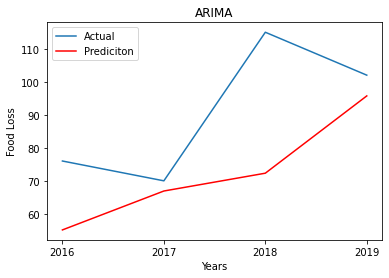

In [54]:
def by_arima(data):
	series=data
	X = series.values
	# size = int(len(X) * 0.66)
	size=6
	train, test = X[0:size], X[size:len(X)]
	history = [x for x in train]
	predictions = list()
	# walk-forward validation
	for t in range(len(test)):
		model = ARIMA(history, order=(1,1,0))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		print('predicted=%f, expected=%f' % (yhat, obs))
	# evaluate forecasts
	arima_mape=np.mean(np.abs((test - predictions)/test))*100
	rmse = sqrt(mean_squared_error(test, predictions))
	print('Test RMSE: %.3f' % rmse)
	print("Test MAPE =", arima_mape)
	return predictions, train,test, rmse,arima_mape
predictions, train,test, rmse_arima, arima_mape=by_arima(lstm_data["Actual Loss"])
# plot forecasts against actual outcomes
years=['2016','2017','2018','2019']
pyplot.plot(years,test)
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
# plt.ylim(23000,26000)
pyplot.show()

In [49]:
losses

,Actual,MeanBasedPred,Actual Loss
Y2010,31.0,31.0,31.0
Y2011,55.0,31.0,55.0
Y2012,54.0,43.0,54.0
Y2013,92.0,54.5,92.0
Y2014,59.0,73.0,59.0
Y2015,53.0,75.5,53.0
Y2016,76.0,56.0,76.0
Y2017,70.0,64.5,70.0
Y2018,115.0,73.0,115.0
Y2019,102.0,92.5,102.0


In [57]:
output = model_fit.forecast()
output

array([100.93111493])

In [47]:
predictions

[107.03533318961419,
 45.61514698351869,
 48.62840188731256,
 54.25662673248464,
 82.16505420409803,
 69.7078447303486,
 54.72667222790201,
 69.16730870574582,
 71.78113117753671,
 100.93111492657344]

In [60]:
lstm_data_arima=lstm_data.copy()

In [69]:
lstm_data_arima

,Actual,MeanBasedPred,Actual Loss
Y2010,31.0,31.0,31.0
Y2011,55.0,31.0,55.0
Y2012,54.0,43.0,54.0
Y2013,92.0,54.5,92.0
Y2014,59.0,73.0,59.0
Y2015,53.0,75.5,53.0
Y2016,76.0,56.0,76.0
Y2017,70.0,64.5,70.0
Y2018,115.0,73.0,115.0
Y2019,102.0,92.5,102.0


predicted=107.035333, expected=31.000000
predicted=45.615147, expected=55.000000
predicted=48.628402, expected=54.000000
predicted=54.256627, expected=92.000000
predicted=82.165054, expected=59.000000
predicted=69.707845, expected=53.000000
predicted=54.726672, expected=76.000000
predicted=69.167309, expected=70.000000
predicted=71.781131, expected=115.000000
predicted=100.931115, expected=102.000000


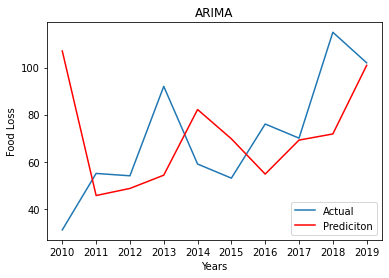

In [75]:
predictions = list()
history = [x for x in lstm_data_arima["Actual Loss"]]
for t in range(len(lstm_data_arima["Actual Loss"])):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = lstm_data_arima["Actual Loss"][t]
    history.append(obs)
    # lstm_data_arima.append(pd.Series(obs).rename("abc"))
    print('predicted=%f, expected=%f' % (yhat, obs))
years=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
pyplot.plot(years,lstm_data_arima["Actual Loss"])
pyplot.plot(predictions, color='red')
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.legend(["Actual","Prediciton"])
plt.title("ARIMA")
# plt.ylim(23000,26000)
pyplot.show()

In [85]:
model_fit.forecast(6)

array([100.93111493, 105.32963775, 103.95447526, 104.38440866,
       104.24999347, 104.29201729])

In [ ]:
or t in range(len(lstm_data_arima["Actual Loss"])):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = lstm_data_arima["Actual Loss"][t]
    history.append(obs)

In [25]:
def df_to_X_y(df, window_size=2):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [26]:
WINDOW_SIZE = 2
X1, y1 = df_to_X_y(lstm_data["Actual Loss"], WINDOW_SIZE)
X1.shape, y1.shape

((8, 2, 1), (8,))

In [27]:
X_train1, y_train1 = X1[:4], y1[:4]
X_val1, y_val1 = X1[4:6], y1[4:6]
X_test1, y_test1 = X1[6:], y1[6:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4, 2, 1), (4,), (2, 2, 1), (2,), (2, 2, 1), (2,))

Data Scaling

In [28]:
scalers = {}
for i in range(X_train1.shape[1]):
    scalers[i] = StandardScaler()
    X_train1[:, i, :] = scalers[i].fit_transform(X_train1[:, i, :]) 

for i in range(X_test1.shape[1]):
    X_test1[:, i, :] = scalers[i].transform(X_test1[:, i, :]) 

# LSTM MODEL

In [29]:
def by_lstm(X_train1, y_train1,X_val1,y_val1):
    model1 = Sequential()
    model1.add(InputLayer((2, 1)))
    model1.add(LSTM(64))
    model1.add(Dense(50, 'relu'))
    model1.add(Dense(50, 'relu'))
    model1.add(Dense(1, 'linear'))

    # model1.summary()

    cp1 = ModelCheckpoint('model1/', save_best_only=True)
    model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=10), metrics=[MeanAbsolutePercentageError()])

    model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp1])
    return model1
model1=by_lstm(X_train1, y_train1, X_val1,y_val1)

2022-07-28 13:35:57.501014: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
1/1 [==============================] - ETA: 0s - loss: 4415.2510 - mean_absolute_percentage_error: 99.9732

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 5s 5s/step - loss: 4415.2510 - mean_absolute_percentage_error: 99.9732 - val_loss: 3924218871808.0000 - val_mean_absolute_percentage_error: 2718240.5000
Epoch 2/200
1/1 [==============================] - ETA: 0s - loss: 8899050602496.0000 - mean_absolute_percentage_error: 3103855.5000

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


1/1 [==============================] - 3s 3s/step - loss: 8899050602496.0000 - mean_absolute_percentage_error: 3103855.5000 - val_loss: 1684996224.0000 - val_mean_absolute_percentage_error: 41816.6406
Epoch 3/200
1/1 [==============================] - 0s 22ms/step - loss: 162160016.0000 - mean_absolute_percentage_error: 14889.6943 - val_loss: 425367633920.0000 - val_mean_absolute_percentage_error: 894938.8125
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 47492.9766 - mean_absolute_percentage_error: 349.1454 - val_loss: 1483169071104.0000 - val_mean_absolute_percentage_error: 1671115.6250
Epoch 5/200
1/1 [==============================] - 0s 23ms/step - loss: 78291.2734 - mean_absolute_percentage_error: 450.2262 - val_loss: 3248349773824.0000 - val_mean_absolute_percentage_error: 2473105.0000
Epoch 6/200
1/1 [==============================] - 0s 22ms/step - loss: 127971.5000 - mean_absolute_percentage_error: 577.4180 - val_loss: 4923672494080.0000 - val_mean_ab

In [30]:
# model1 = load_model('model1/')

In [31]:
test_predictions_x=tf.convert_to_tensor(X1, dtype=tf.int64)
train_predictions = model1.predict(test_predictions_x).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y1})
train_results

1/1 [==============================] - 0s 397ms/step


,Train Predictions,Actuals
0,-4.426502e+01,54.0
1,-4.426502e+01,92.0
2,-4.426502e+01,59.0
3,-4.426502e+01,53.0
4,1.574185e+08,76.0
5,1.706567e+08,70.0
6,-4.426502e+01,115.0
7,-4.426502e+01,102.0


In [32]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1/1 [==============================] - 0s 334ms/step


,Train Predictions,Actuals
0,-44.265018,54.0
1,-44.265018,92.0
2,-44.265018,59.0
3,-44.265018,53.0


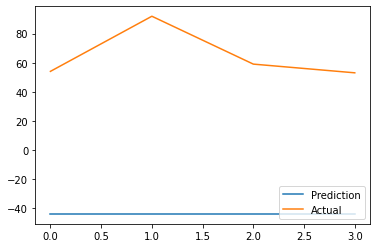

In [33]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])
plt.legend(['Prediction', 'Actual'], loc='lower right')

In [34]:
val_predictions2 = model1.predict(X_val1).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions':val_predictions2, 'Actuals':y_val1})
val_results2

1/1 [==============================] - 0s 15ms/step


,Val Predictions,Actuals
0,157418496.0,76.0
1,170656656.0,70.0


In [35]:
# plt.plot(val_results['Val Predictions'])
# plt.plot(val_results['Actuals'])

In [36]:
test_predictions2 = model1.predict(X_test1).flatten()
test_results2 = pd.DataFrame(data={'Train Predictions':test_predictions2, 'Actuals':y_test1})
test_results2

1/1 [==============================] - 0s 15ms/step


,Train Predictions,Actuals
0,-44.265018,115.0
1,-44.265018,102.0


In [37]:
lstm_mape=np.mean(np.abs((y_test1 - test_predictions2)/y_test1))*100
print("MAPE =",lstm_mape)

MAPE = 140.9441986636839


dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


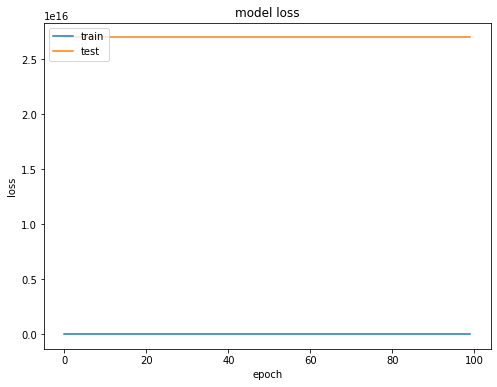

In [38]:
history = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)  #..., callbacks=[cp1], verbose=0)
print(history.history.keys())

figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
losses_new_2=losses.copy()
for i in [2020,2021,2022]:
    new=asarray([[[losses_new_2["Actual"].loc["Y"+str(i-2)]],[losses_new_2["Actual"].loc["Y"+str(i-1)]]]])
    new[0]=scalers[1].transform(new[0])
    new=tf.convert_to_tensor(new, dtype=tf.int64)
    new_out=model1.predict(new).flatten()
    new_out=pd.DataFrame(new_out, index=["Y"+str(i)], columns=["Actual"])
    losses_new_2=pd.concat([losses_new_2,new_out])

1/1 [==============================] - 0s 15ms/step


In [42]:
losses_new_2

,Actual,MeanBasedPred,Actual Loss
Y2010,31.0,31.0,31.0
Y2011,55.0,31.0,55.0
Y2012,54.0,43.0,54.0
Y2013,92.0,54.5,92.0
Y2014,59.0,73.0,59.0
Y2015,53.0,75.5,53.0
Y2016,76.0,56.0,76.0
Y2017,70.0,64.5,70.0
Y2018,115.0,73.0,115.0
Y2019,102.0,92.5,102.0


# GRU MODEL

In [43]:
def by_gru():
    model3 = Sequential()
    model3.add(InputLayer((2, 1)))
    model3.add(GRU(64))
    model3.add(Dense(50, 'relu'))
    model3.add(Dense(50, 'relu'))
    model3.add(Dense(1, 'linear'))
    model3.summary()

    cp3 = ModelCheckpoint('model3/', save_best_only=True)
    model3.compile(loss=MeanAbsolutePercentageError(), optimizer=Adam(learning_rate=0.1), metrics=[MeanAbsolutePercentageError()])
    return model3

model3=by_gru()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18,715
Trainable params: 18,715
Non-trainable params: 0
_________________________________________________________________


In [44]:
history=model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp3])

NameError: name 'cp3' is not defined

In [ ]:
# model3 = load_model('model3/')
train_predictions3 = model3.predict(X_train1).flatten()
train_results3 = pd.DataFrame(data={'Train Predictions':train_predictions3, 'Actuals':y_train1})
train_results3

1/1 [==============================] - 0s 309ms/step


,Train Predictions,Actuals
0,4.996025,5.0
1,3.998509,4.0
2,5.795454,6.0
3,4.989415,5.0


Text(0.5, 1.0, 'GRU')

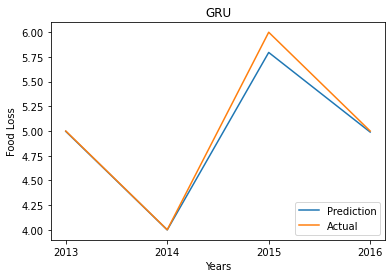

In [ ]:
train_results3.index=['2013','2014','2015','2016']
plt.plot(train_results3['Train Predictions'])
plt.plot(train_results3['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
# plt.ylim(20000,,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
# plt.ylim(20000,28000)

1/1 [==============================] - 0s 15ms/step


Text(0.5, 1.0, 'GRU')

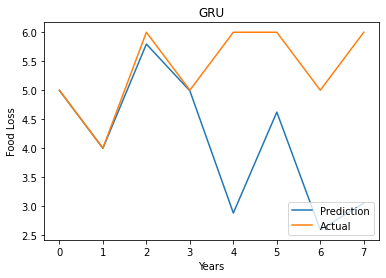

In [ ]:
train_results3.index=['2013','2014','2015','2016']
gru_preds = model3.predict(X1).flatten()
gru_results = pd.DataFrame(data={'Train Predictions':gru_preds, 'Actuals':y1})

plt.plot(gru_results['Train Predictions'])
plt.plot(gru_results['Actuals'])

plt.legend(['Prediction', 'Actual'], loc='lower right')
# plt.ylim(20000,,30000)
pyplot.xlabel("Years")
pyplot.ylabel("Food Loss")
plt.title("GRU")
# plt.ylim(20000,28000)

In [ ]:
# # history = model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, verbose=0)
# print(history.history.keys())


# figure(figsize=(8, 6))
# plt.plot(history.history['mean_absolute_percentage_error'])
# plt.plot(history.history['val_mean_absolute_percentage_error'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [ ]:
val_predictions3 = model3.predict(X_val1).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions':val_predictions3, 'Actuals':y_val1})
val_results3

1/1 [==============================] - 0s 15ms/step


,Val Predictions,Actuals
0,2.880883,6.0
1,4.622295,6.0


In [ ]:
# test_predictions3=tf.convert_to_tensor(test_predictions3, dtype=tf.int64)
test_predictions3 = model3.predict(X_test1).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions':test_predictions3, 'Actuals':y_test1})
test_results3

1/1 [==============================] - 0s 15ms/step


,Test Predictions,Actuals
0,2.589651,5.0
1,3.050716,6.0


In [ ]:
gru_mape=np.mean(np.abs((y_test1 - test_predictions3)/y_test1))*100

In [ ]:
mape_mean,arima_mape,lstm_mape,gru_mape

(12.5, 10.996091849366437, 912.7699915568033, 48.68085662523905)

In [ ]:
losses_new=losses.copy()
for i in [2020,2021,2022]:
    new=asarray([[[losses_new["Actual"].loc["Y"+str(i-2)]],[losses_new["Actual"].loc["Y"+str(i-1)]]]])
    new[0]=scalers[1].transform(new[0])
    new=tf.convert_to_tensor(new, dtype=tf.int64)
    new_out=model3.predict(new).flatten()
    new_out=pd.DataFrame(new_out, index=["Y"+str(i)], columns=["Actual"])
    losses_new=pd.concat([losses_new,new_out])

1/1 [==============================] - 0s 14ms/step


In [ ]:
losses_new

,Actual,MeanBasedPred
Y2010,4.0,4.0
Y2011,5.0,4.0
Y2012,5.0,4.5
Y2013,4.0,5.0
Y2014,6.0,4.5
Y2015,5.0,5.0
Y2016,6.0,5.5
Y2017,6.0,5.5
Y2018,5.0,6.0
Y2019,6.0,5.5
